<a href="https://colab.research.google.com/github/hadamard-2/GeezDigitsOCR/blob/main/FNN_for_Afro_MNIST_OCR_(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries & Loading the Dataset

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

path = "/content/drive/MyDrive/Ethiopic-MNIST/Ethiopic_MNIST_"
# training set
X_train = np.load(path + "X_train.npy")
y_train = np.load(path + "y_train.npy")

X_temp = np.load(path + "X_test.npy")
y_temp = np.load(path + "y_test.npy")
# validation & test set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

8


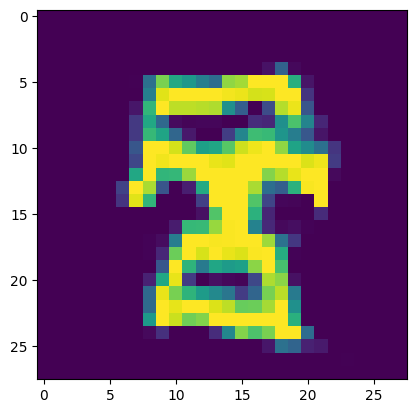

In [ ]:
import random

idx = random.randint(0, len(X_train))

print(y_train[idx] + 1)
plt.imshow(X_train[idx])
plt.show()

### Normalizing the Input

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

4


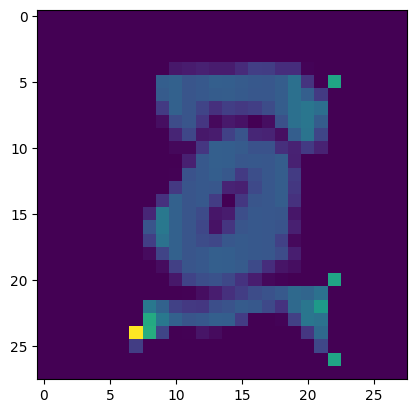

In [ ]:
idx = random.randint(0, len(X_train))

print(y_train[idx] + 1)
plt.imshow(X_train[idx])
plt.show()

### Creating the Neural Network

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_val shape: (5000, 28, 28)
y_val shape: (5000,)
X_test shape: (5000, 28, 28)
y_test shape: (5000,)


### Training the Model

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/3
469/469 [==============================] - 7s 14ms/step - loss: 0.2735 - accuracy: 0.9327 - val_loss: 10.6262 - val_accuracy: 0.9876
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 12.6146 - val_accuracy: 0.9900
Epoch 3/3
469/469 [==============================] - 3s 6ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 10.3701 - val_accuracy: 0.9906


### Evaluating the Model with the Test Set

In [ ]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9878


[0.036752574145793915, 0.9878000020980835]

In [ ]:
model_num = 0
model.save(f"/content/drive/MyDrive/ML Models/Afro-MNIST_FNN_model{model_num}")
model_num += 1

### Testing the Model
> using examples from the test set

In [ ]:
def get_predictions(y_test, y_test_pred, correct=True):
    results = []
    for i in range(y_test.shape[0]):
        pred = np.argmax(y_test_pred[i])
        actual = y_test[i]

        if (pred == actual and correct) or (pred != actual and not correct):
            results.append((i, pred, actual))

    return results


y_test_pred = model.predict(X_test)
correct_predictions = get_predictions(y_test, y_test_pred, correct=True)
incorrect_predictions = get_predictions(y_test, y_test_pred, correct=False)

157/157 [==============================] - 1s 3ms/step


Actual: 9
Predicted: 9


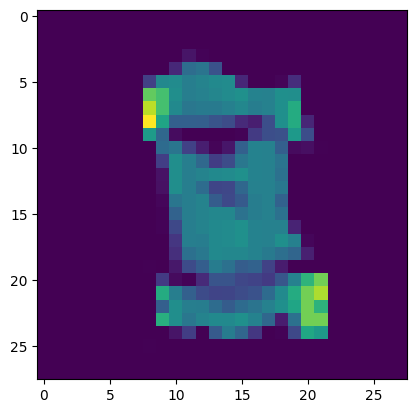

In [ ]:
# Correct Prediction

idx = random.randint(0, len(correct_predictions) - 1)
actual = correct_predictions[idx][2] + 1
predicted = correct_predictions[idx][1] + 1

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")
plt.imshow(X_test[correct_predictions[idx][0]])

plt.savefig(f"/content/drive/MyDrive/plots & figures/a{actual}_p{predicted}.png", dpi=300)

plt.show()

Actual: 9
Predicted: 4


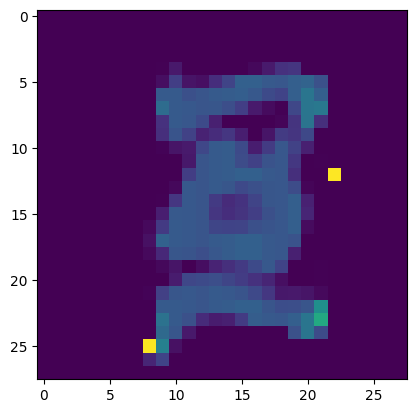

In [ ]:
# Inorrect Prediction

idx = random.randint(0, len(incorrect_predictions) - 1)
actual = incorrect_predictions[idx][2] + 1
predicted = incorrect_predictions[idx][1] + 1

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")
plt.imshow(X_test[incorrect_predictions[idx][0]])

plt.savefig(f"/content/drive/MyDrive/plots & figures/a{actual}_p{predicted}.png", dpi=300)

plt.show()

### Plots

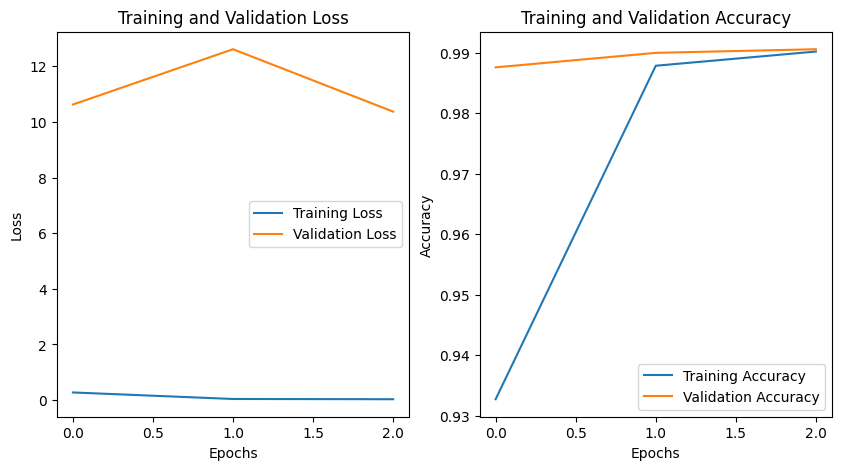

In [ ]:
# Extract loss and accuracy for both training and validation sets
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig("/content/drive/MyDrive/plots & figures/training_history.png", dpi=300)

plt.show()